In [ ]:
!pip install sympy

## Fehlerrechnung
* automatische Ableitung der Funktion
* Einsetzen der Werte
* gibt Latex aus

In [24]:
from sympy import *
from IPython.display import display
init_printing()
import numpy as np
from sympy.parsing.sympy_parser import parse_expr

class Parser:
    def __init__(self):
        self.f = None
        self.values = {}
        self.unit = None

    def eingeschissen(self):
        wraplatex = "$$"

        change = input("1. Change function [f]\n2. Change variables [v]\n(default=v)") or "v"
        if change == 'v':
            if not self.f: 
                print("Please define function first!")
                self.f = input("Function name: ")
                self.eq = parse_expr(input("Function: "), evaluate=False)
                self.unit = parse_expr(input("Unit: "), evaluate=False)
            for sym in self.eq.free_symbols:
                self.values[str(sym)] = float(input(f"{sym}: "))
                self.values[f"\\Delta {sym}"] = float(input(f"Δ{sym}: "))
        if change == 'f':
            self.f = input("Function name: ")
            self.eq = parse_expr(input("Function: "), evaluate=False)
            self.unit = parse_expr(input("Unit: "), evaluate=False)
            if sorted(list(self.values.keys())) != sorted([str(x) for x in self.eq.free_symbols]):
                print("Please redefine the parameters")
                for sym in self.eq.free_symbols:
                    self.values[str(sym)] = float(input(f"{sym}: "))
                    self.values[f"\\Delta {sym}"] = float(input(f"Δ{sym}: "))
        display(Eq(Symbol(self.f), self.eq))

        deltaf = 0
        for sym in self.eq.free_symbols:
            deltaf += abs(self.eq.diff(sym)) * Symbol(f'\Delta {sym}')

        deltaresult = lambdify(list(deltaf.free_symbols), deltaf, 'numpy')(*[self.values[str(x)] for x in deltaf.free_symbols])

        result = lambdify(list(self.eq.free_symbols), self.eq, 'numpy')(*[self.values[str(x)] for x in self.eq.free_symbols])
        rel = deltaresult/result*100
        display(Eq(Symbol(f'\Delta {self.f}'), deltaf))
        print(wraplatex+latex(Eq(Symbol(f'\Delta {self.f}'), deltaf))+wraplatex)
        print()

        display(Eq(Symbol(self.f), self.eq))
        print(wraplatex+latex(Eq(Symbol(self.f), self.eq))+wraplatex)
        print()

        display(Eq(Symbol(f'\Delta {self.f}'), deltaresult))
        print(wraplatex+latex(Eq(Symbol(f'\Delta {self.f}'), deltaresult)).replace(".","{,}")+latex(self.unit)+wraplatex)
        print()

        display(Eq(Symbol(self.f), Symbol(f'({result} \pm {deltaresult})')))
        print(wraplatex+latex(Eq(Symbol(self.f), Symbol(f'({result} \pm {deltaresult})'))).replace(".", "{,}")+latex(self.unit)+wraplatex)
        print()

        display(Eq(Symbol(f'\Delta {self.f}')/Symbol(self.f), Symbol(f'{rel}\%')))
        print(wraplatex+latex(Eq(Symbol(f'\Delta {self.f}')/Symbol(self.f), Symbol(f'{rel}\%'))).replace(".", "{,}")+latex(self.unit)+wraplatex)
        print()
    
parser = Parser()

1. Change function [f]
2. Change variables [v]
(default=v)
Please define function first!
Function name: v
Function: s/t
Unit: m/s
s: 10
Δs: 0.1
t: 5
Δt: 0.1


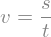

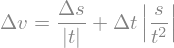

$$\Delta v = \frac{\Delta s}{\left|{t}\right|} + \Delta t \left|{\frac{s}{t^{2}}}\right|$$



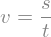

$$v = \frac{s}{t}$$



$$\Delta v = 0{,}06\left[\frac{m}{s}\right]$$



$$v = (2{,}0 \pm 0{,}06000000000000001)\left[\frac{m}{s}\right]$$



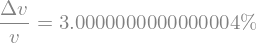

$$\frac{\Delta v}{v} = 3{,}0000000000000004\%\left[\frac{m}{s}\right]$$




In [25]:
parser.eingeschissen()
print()

## Steigungsfehler einer linearen Funktion
Es geschieht über lineare Regression der Fehlermaxima. Die Fehlergrenzgeraden liegen auf Flächen die von den Einzelfehlern von X und Y aufgespannt werden. Funktioniert nur wenn die Messwerte keine zu großen Messfehler aufweisen.

In [ ]:
def steigungsfehler(X, Y, Dx, Dy, plot=True, a=0.75):
    import numpy as np 
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    lowerX = np.array([X[i] + 2*Dx*(i/(n-1))-Dx for i in range(n)])
    lowerY = np.array([Y[i] + 2*Dy*(i/(n-1))-Dy for i in range(n)])
    upperX = np.array([X[i] + 2*Dx*(i/(n-1))-Dx for i in range(n)])
    upperY = np.array([Y[i] - 2*Dy*(i/(n-1))+Dy for i in range(n)])

    def linreg(x, y):
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        return m, c
    m, c = linreg(X, Y)
    LineX = np.array(X)
    LineY = m*LineX+c
    
    lowM, lowC = linreg((a*lowerX+(1-a)*X), (a*lowerY+(1-a)*Y))
    LineLowerX = np.array(lowerX)
    LineLowerY = lowM*LineLowerX+lowC

    upM, upC = linreg((a*upperX+(1-a)*X), (a*upperY+(1-a)*Y))
    LineUpperX = np.array(upperX)
    LineUpperY = upM*LineUpperX+upC

    if plot:
        plt.plot(LineX, LineY)
        plt.plot(LineLowerX, LineLowerY)
        plt.plot(LineUpperX, LineUpperY)

        plt.scatter(X, Y, marker='x')
        plt.scatter(lowerX, lowerY, marker='x')
        plt.scatter(upperX, upperY, marker='x')

        plt.show()
    return abs(upM - lowM) / 2

import matplotlib.pyplot as plt
X =[float(x) for x in input("X: ").strip().split(' ')]
Y = [float(x) for x in input("Y: ").strip().split(' ')]
DX = float(input("ΔX: "))
DY = float(input("ΔY: "))
steigungsfehler(X, Y, DX, DY)

In [1]:
import numpy as np
np.random.rand(10,3)

array([[0.63428257, 0.60952493, 0.69476098],
       [0.44079193, 0.03046783, 0.90032935],
       [0.52394176, 0.17271133, 0.05279053],
       [0.37743627, 0.49650998, 0.03689853],
       [0.17939948, 0.50129214, 0.59765226],
       [0.4856581 , 0.81237206, 0.42690731],
       [0.38337673, 0.24534234, 0.46997262],
       [0.19000069, 0.61114194, 0.43206068],
       [0.07434413, 0.86695231, 0.62915308],
       [0.14575099, 0.97286251, 0.15131917]])